## __torchvision.transformsまとめ__

### __準備__

In [5]:
import urllib.request
from PIL import Image
from torch.utils import data
from torchvision import transforms

In [6]:
# 画像のダウンロード
file_path = "sample.png"
with urllib.request.urlopen("https://publish-image.vercel.app/_next/image?url=%2Fimages%2Fchapter13%2Fsample_image.png&w=828&q=75") as web_file:
    data = web_file.read()
    with open(file_path, mode='wb') as local_file:
        local_file.write(data)

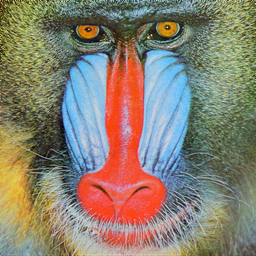

In [8]:
# 元画像
img = Image.open(file_path)
img

### __画像に対するtransform__

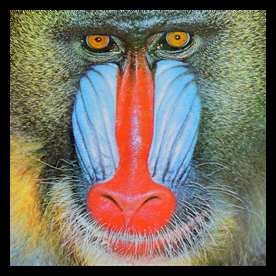

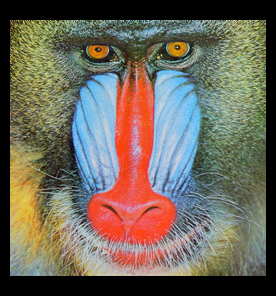

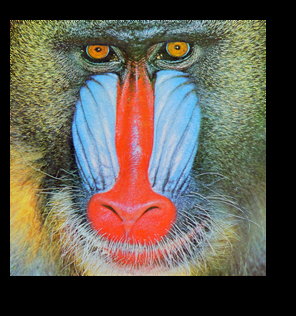

In [21]:
# Padding
# padding幅のピクセル数を指定する

# 上下左右
display(transforms.Pad(10)(img))
print()

# (左右, 上下)
display(transforms.Pad((10, 20))(img))
print()

# (左, 上, 右, 下)
display(transforms.Pad((10, 20, 30, 40))(img))

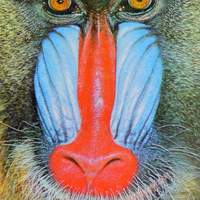

In [26]:
# 画像の中心を切り抜く
# 切り抜く幅と高さを指定

transforms.CenterCrop(200)(img)

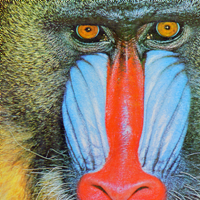

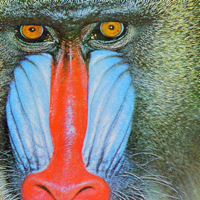

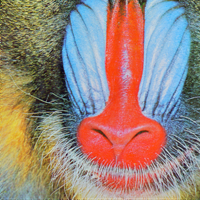

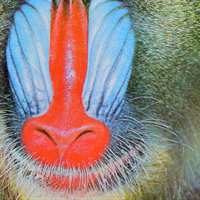

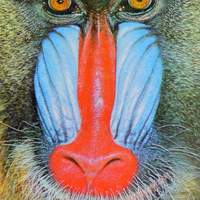

In [29]:
# 4隅と中心の計5箇所を切り抜く
# 切り抜く幅と高さを指定

for image in transforms.FiveCrop(200)(img):
    display(image)
    print()

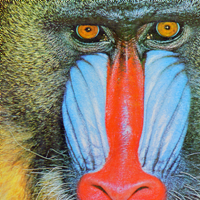

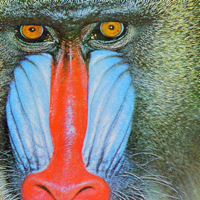

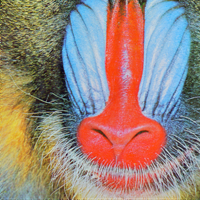

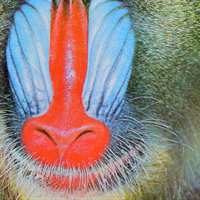

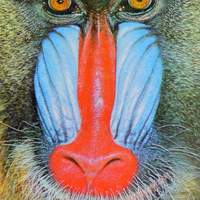

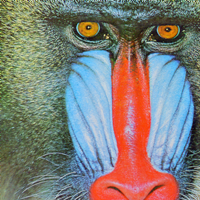

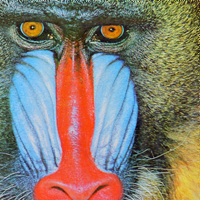

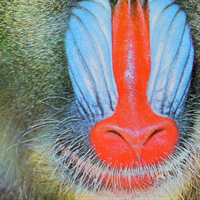

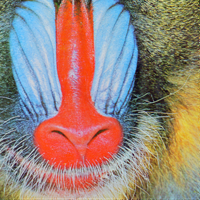

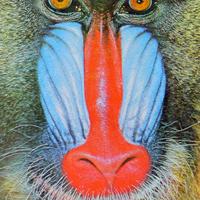

In [33]:
# 元の画像と左右反転した画像に対して、4隅と中心の計10箇所を切り抜く
# 切り抜く幅と高さを指定

for image in transforms.TenCrop(200)(img):
    display(image)
    print()

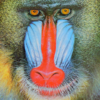

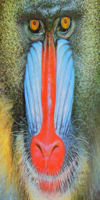

In [38]:
# リサイズ
# 変形する幅と高さを指定
# 補完方法を指定できる

display(transforms.Resize(100)(img))
print()

display(transforms.Resize((200, 100))(img))

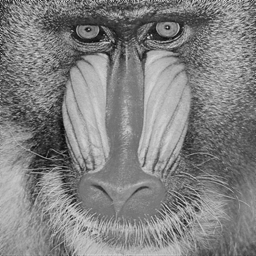

In [39]:
# グレースケール変換
transforms.Grayscale()(img)

### __Augumentationで使うtransform__

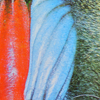

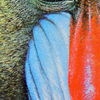

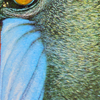

In [55]:
# ランダムに画像を切り抜く

for _ in range(3):
    display(transforms.RandomCrop(100)(img))
    print()

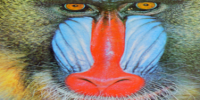

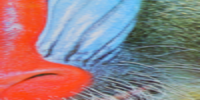

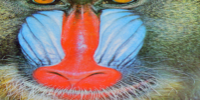

In [63]:
# ランダムに切り抜いた後、リサイズを行う

for _ in range(3):
    display(transforms.RandomResizedCrop((100, 200))(img))
    print()

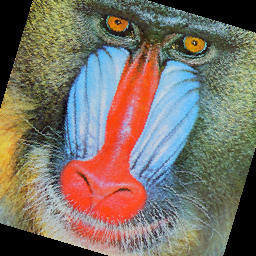

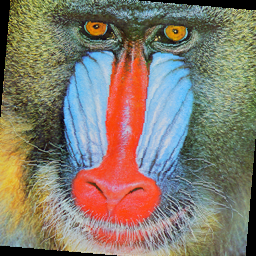

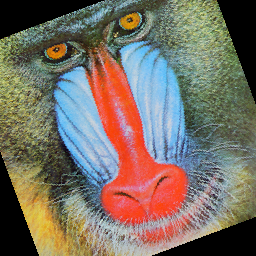

In [131]:
# ランダムに回転を行う

# degrees: 変形する角度を指定する(単位は度)

for _ in range(3):
    display(transforms.RandomRotation(30)(img))
    print()

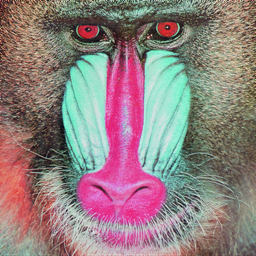

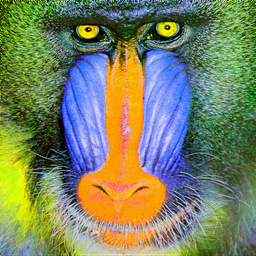

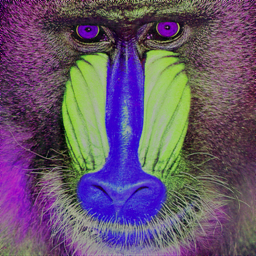

In [74]:
# ランダムに明るさ、コントラスト、彩度、色相を変化させる

# brightness: 明るさの変動幅
# contrast: コントラストの変動幅
# saturation: サイドの変動幅
# hue: 色相の変動幅

for _ in range(3):
    display(
        transforms.ColorJitter(
            brightness=0.5,
            contrast=0.5,
            saturation=0.5,
            hue=0.5,
        )(img)
    )
    print()

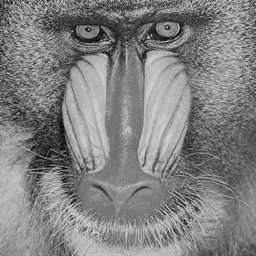

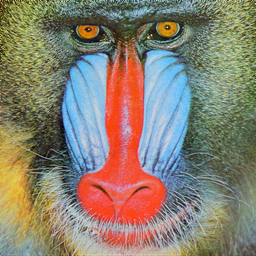

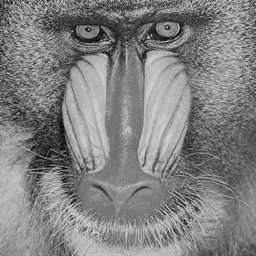

In [84]:
# ランダムにグレースケール変換を行う

# p=0.1: グレースケールに変換される確率

for _ in range(3):
    display(transforms.RandomGrayscale(p=0.5)(img))
    print()

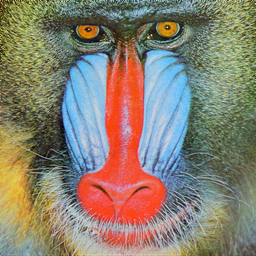

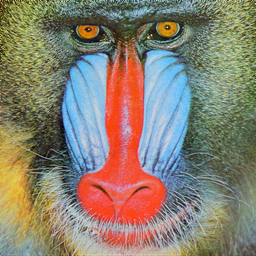

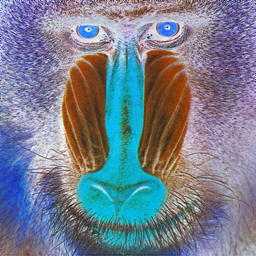

In [138]:
# ランダムにネガポジ反転を行う

# p=0.5: ネガポジ反転を行う確率

for _ in range(3):
    display(transforms.RandomInvert()(img))
    print()

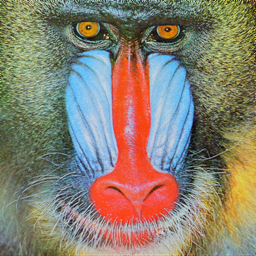

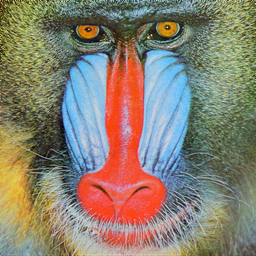

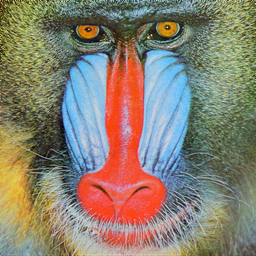

In [88]:
# ランダムに左右反転を行う

# p=0.5: 左右反転が行われる確率

for _ in range(3):
    display(transforms.RandomHorizontalFlip()(img))
    print()

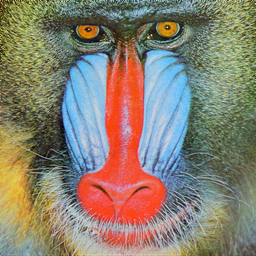

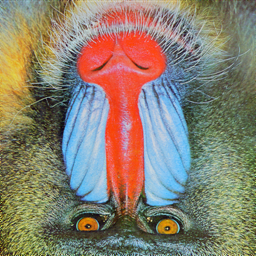

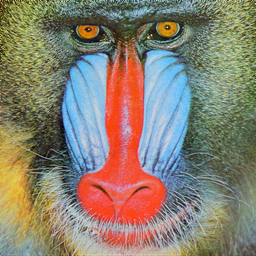

In [89]:
# ランダムに上下反転を行う

# p=0.5: 上下反転が行われる確率

for _ in range(3):
    display(transforms.RandomVerticalFlip()(img))
    print()

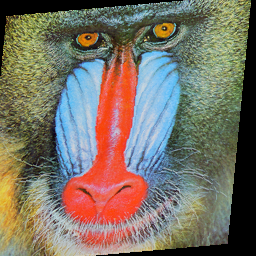

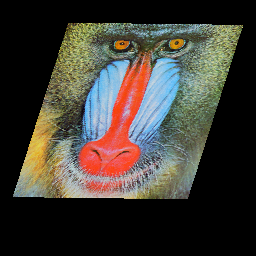

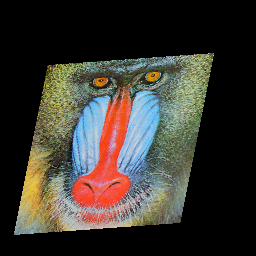

In [117]:
# ランダムにアフィン変換を行う
# 2次元上の他の平行四辺形に変換する

# degrees: 変形する角度を指定する(単位は度)
# translate: (x軸方向の移動幅, y軸方向の移動幅)を[0, 1]の範囲で指定
# scale: (a, b)で指定して、[a, b]の範囲で拡大・縮小する
# shear: 剪断(歪ませる)角度を指定。float、2配列、4配列で指定可能

for _ in range(3):
    display(
        transforms.RandomAffine(
            degrees=10,
            translate=(0.1, 0.1),
            scale=(0.5, 1),
            shear=(10, 20)
        )(img)
    )
    print()

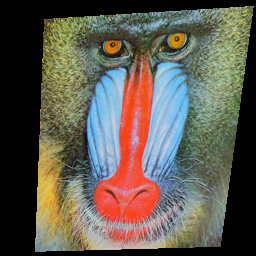

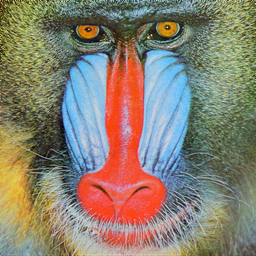

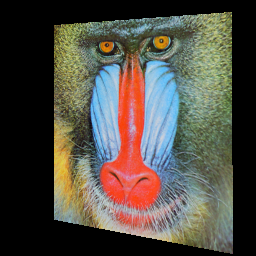

In [124]:
# ランダムに射影変換を行う
# 3次元上の他の平行四辺形に変換する

# distortion_scale=0.5: 歪ませる幅
# p=0.5: 射影変換を行う確率

for _ in range(3):
    display(transforms.RandomPerspective()(img))
    print()

### __テンソルに対するtransform__

In [143]:
# PIL Imageをテンソルに変換する
# 値の範囲を[0, 1]に変換
# (幅、高さ, チャンネル数)→(チャンネル数、幅、高さ)に変換

data = transforms.ToTensor()(img)

print(data)
print()
print("形状:", data.shape)

tensor([[[0.6431, 0.2941, 0.6157,  ..., 0.3686, 0.5686, 0.5529],
         [0.3882, 0.2353, 0.3922,  ..., 0.5216, 0.4078, 0.3412],
         [0.4314, 0.6353, 0.3098,  ..., 0.4549, 0.2588, 0.2510],
         ...,
         [0.3804, 0.4510, 0.5176,  ..., 0.3608, 0.3804, 0.3725],
         [0.3765, 0.5216, 0.4941,  ..., 0.3843, 0.3882, 0.4196],
         [0.4941, 0.4745, 0.3961,  ..., 0.3412, 0.3255, 0.3882]],

        [[0.5882, 0.1686, 0.5490,  ..., 0.3020, 0.5451, 0.6667],
         [0.2902, 0.1608, 0.4157,  ..., 0.5804, 0.4000, 0.3569],
         [0.3294, 0.5176, 0.2941,  ..., 0.4980, 0.2471, 0.3569],
         ...,
         [0.4196, 0.5412, 0.6078,  ..., 0.4039, 0.3882, 0.3098],
         [0.4510, 0.6275, 0.6000,  ..., 0.4000, 0.4000, 0.3176],
         [0.6627, 0.5333, 0.3961,  ..., 0.3451, 0.3137, 0.2706]],

        [[0.2784, 0.0392, 0.2863,  ..., 0.1373, 0.2549, 0.3961],
         [0.1216, 0.1412, 0.2000,  ..., 0.3216, 0.2510, 0.3020],
         [0.1529, 0.2039, 0.1608,  ..., 0.3529, 0.1608, 0.

In [149]:
# 正規化
# 引数は平均値と標準偏差

data = transforms.Normalize(data.mean(), data.std())(data)

print(data)
print()
print("平均:", data.mean(), "標準偏差:", data.std())

tensor([[[ 0.7050, -0.9567,  0.5743,  ..., -0.6020,  0.3502,  0.2756],
         [-0.5086, -1.2368, -0.4899,  ...,  0.1262, -0.4153, -0.7327],
         [-0.3032,  0.6676, -0.8820,  ..., -0.1912, -1.1247, -1.1621],
         ...,
         [-0.5459, -0.2099,  0.1075,  ..., -0.6393, -0.5459, -0.5833],
         [-0.5646,  0.1262, -0.0045,  ..., -0.5273, -0.5086, -0.3592],
         [-0.0045, -0.0979, -0.4713,  ..., -0.7327, -0.8073, -0.5086]],

        [[ 0.4436, -1.5542,  0.2569,  ..., -0.9194,  0.2382,  0.8170],
         [-0.9754, -1.5915, -0.3779,  ...,  0.4063, -0.4526, -0.6580],
         [-0.7887,  0.1075, -0.9567,  ...,  0.0142, -1.1807, -0.6580],
         ...,
         [-0.3592,  0.2196,  0.5370,  ..., -0.4339, -0.5086, -0.8820],
         [-0.2099,  0.6303,  0.4996,  ..., -0.4526, -0.4526, -0.8447],
         [ 0.7983,  0.1822, -0.4713,  ..., -0.7140, -0.8633, -1.0687]],

        [[-1.0314, -2.1703, -0.9940,  ..., -1.7035, -1.1434, -0.4713],
         [-1.7782, -1.6849, -1.4048,  ..., -0

### __transformをまとめるtransform__

In [175]:
# transformのリスト

transform_list = [
    transforms.Resize((100, 200)),
    transforms.CenterCrop(100),
    transforms.Grayscale()
]

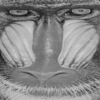

In [176]:
# transformを順番に行う

transforms.Compose(transform_list)(img)

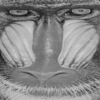

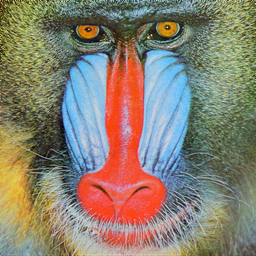

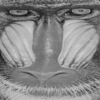

In [161]:
# transformを指定した確率で行う

# p=0.5: 確率

for _ in range(3):
    display(transforms.RandomApply(transform_list)(img))

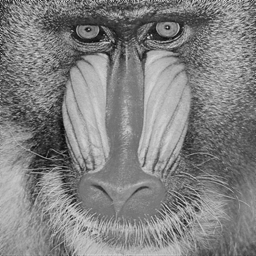

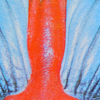

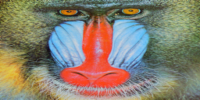

In [165]:
# 複数のtransformからランダムに1つ行う

for _ in range(3):
    display(transforms.RandomChoice(transform_list)(img))

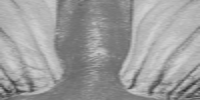

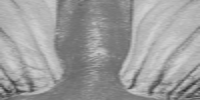

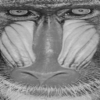

In [174]:
# 複数のtransformをランダムに入れ替えて行う

for _ in range(3):
    display(transforms.RandomOrder(transform_list)(img))